In [1]:
"""
Consolidates everything from all prior tutorials, except "euclidian stuff" (for that see 240410_kedar_euclidia...)
"""

'\nConsolidates everything from all prior tutorials, except "euclidian stuff" (for that see 240410_kedar_euclidia...)\n'

In [2]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt

# Load DFallPa dataset

In [3]:
animal = "Diego"
date = 230615

if True:
    # Load directly the dataset, given its path.

    # this is the path to the dataset
    # path = f"/home/lucas/Dropbox/SCIENCE/FREIWALD_LAB/DATA/Xuan/DFallpa-Diego-230615-trial-kilosort_if_exists-norm=None-combine=True.pkl"
    # path = f"/home/lucas/Dropbox/SCIENCE/FREIWALD_LAB/DATA/Xuan/DFallpa-Diego-230615-trial-kilosort_if_exists-norm=None-combine=True.pkl"
    path = f"/lemur2/lucas/Dropbox/SCIENCE/FREIWALD_LAB/DATA/Xuan/DFallpa-{animal}-{date}-trial-kilosort_if_exists-norm=None-combine=True-t1=-1.0-t2=1.8-quest=SP_BASE_trial.pkl"
    DFallpa = pd.read_pickle(path)


else:
    # Use a loading fucntion, only works if you have the entire dataset "ecosystem"
    
    from neuralmonkey.classes.population_mult import load_handsaved_wrapper, dfpa_match_chans_across_pa_each_bregion
    from neuralmonkey.classes.population_mult import extract_single_pa

    # Method 1 - load a single DFallPA
    DFallpa = load_handsaved_wrapper()

    # Method 1 - load a single DFallPA

    # animal = "Diego"
    # date = 240625

    # animal = "Pancho"
    # date = 240509
    # version = "trial"
    # combine = True
    # question = "SP_BASE_trial"
    animal = "Diego"
    date = 230630   
    version = "saccade_fix_on"
    combine = True
    question = None
    ignore_question = True
    DFallpa = load_handsaved_wrapper(animal=animal, date=date, combine_areas=combine, version=version, question=question, 
                                    ignore_question=ignore_question)




In [4]:
if False: # Ignore, this is scratch
    pa = DFallpa["pa"].values[0]
    dflab = pa.Xlabels["trials"]
    dflab["taskconfig_shploc_SHSEM"].value_counts()
    #  'taskconfig_loc',
    #  'taskconfig_shp',
    #  'taskconfig_shp_SHSEM',
    #  'taskconfig_shploc',
    #  'taskconfig_shploc_SHSEM',


    # pa = DFallpa["pa"].values[1]
    # dflab = pa.Xlabels["trials"]
    # dflab["event_idx_within_trial"].value_counts()
    # print("\nTask kind...")
    # print(dflab[dflab["trialcode"] == "230630-1-564"]["task_kind"])

    # print("\nData for each fixation on this trial (during samp):")
    # dflab[dflab["trialcode"] == "230630-1-564"].loc[:, ["event_idx_within_trial", "shape-fixation", "loc-fixation", "seqc_0_shape", "seqc_0_loc"]]
    # dflab[dflab["trialcode"] == "230630-1-564"]["shape-fixation"]

# Quick look at DFallpa

In [5]:
# This holds data across multiple brain regions (the "bregion" column)
# -- "event", the event during trial which this data is aligned to
# -- "twind", time extracted aligned to that event, in seconds
# -- pa, PopAnal class holding neurla data and behavioral features.
# -- pa_x_shape, shape of neural data, in (chans, trials, times)
# Ingore the "which_level"

display(DFallpa)


which_level              event bregion        twind  \
0        trial            03_samp      M1  (-1.0, 1.8)   
1        trial            03_samp     PMv  (-1.0, 1.8)   
2        trial            03_samp     PMd  (-1.0, 1.8)   
3        trial            03_samp   dlPFC  (-1.0, 1.8)   
4        trial            03_samp   vlPFC  (-1.0, 1.8)   
5        trial            03_samp      FP  (-1.0, 1.8)   
6        trial            03_samp     SMA  (-1.0, 1.8)   
7        trial            03_samp  preSMA  (-1.0, 1.8)   
8        trial     05_first_raise      M1  (-1.0, 1.8)   
9        trial     05_first_raise     PMv  (-1.0, 1.8)   
10       trial     05_first_raise     PMd  (-1.0, 1.8)   
11       trial     05_first_raise   dlPFC  (-1.0, 1.8)   
12       trial     05_first_raise   vlPFC  (-1.0, 1.8)   
13       trial     05_first_raise      FP  (-1.0, 1.8)   
14       trial     05_first_raise     SMA  (-1.0, 1.8)   
15       trial     05_first_raise  preSMA  (-1.0, 1.8)   
16       trial  06_on_strokeidx_0      M1  (-1.0, 1.8)   
17       trial  06_on_strokeidx_0     PMv  (-1.0, 1.8)   
18       trial  06_on_strokeidx_0     PMd  (-1.0, 1.8)   
19       trial  06_on_strokeidx_0   dlPFC  (-1.0, 1.8)   
20       trial  06_on_strokeidx_0   vlPFC  (-1.0, 1.8)   
21       trial  06_on_strokeidx_0      FP  (-1.0, 1.8)   
22       trial  06_on_strokeidx_0     SMA  (-1.0, 1.8)   
23       trial  06_on_strokeidx_0  preSMA  (-1.0, 1.8)   

                                                   pa      pa_x_shape  
0   <neuralmonkey.classes.population.PopAnal objec...  (46, 425, 280)  
1   <neuralmonkey.classes.population.PopAnal objec...  (70, 425, 280)  
2   <neuralmonkey.classes.population.PopAnal objec...  (37, 425, 280)  
3   <neuralmonkey.classes.population.PopAnal objec...  (23, 425, 280)  
4   <neuralmonkey.classes.population.PopAnal objec...  (54, 425, 280)  
5   <neuralmonkey.classes.population.PopAnal objec...  (35, 425, 280)  
6   <neuralmonkey.classes.population.PopAnal objec...  (53, 425, 280)  
7   <neuralmonkey.classes.population.PopAnal objec...  (68, 425, 280)  
8   <neuralmonkey.classes.population.PopAnal objec...  (46, 425, 280)  
9   <neuralmonkey.classes.population.PopAnal objec...  (70, 425, 280)  
10  <neuralmonkey.classes.population.PopAnal objec...  (37, 425, 280)  
11  <neuralmonkey.classes.population.PopAnal objec...  (23, 425, 280)  
12  <neuralmonkey.classes.population.PopAnal objec...  (54, 425, 280)  
13  <neuralmonkey.classes.population.PopAnal objec...  (35, 425, 280)  
14  <neuralmonkey.classes.population.PopAnal objec...  (53, 425, 280)  
15  <neuralmonkey.classes.population.PopAnal objec...  (68, 425, 280)  
16  <neuralmonkey.classes.population.PopAnal objec...  (46, 425, 280)  
17  <neuralmonkey.classes.population.PopAnal objec...  (70, 425, 280)  
18  <neuralmonkey.classes.population.PopAnal objec...  (37, 425, 280)  
19  <neuralmonkey.classes.population.PopAnal objec...  (23, 425, 280)  
20  <neuralmonkey.classes.population.PopAnal objec...  (54, 425, 280)  
21  <neuralmonkey.classes.population.PopAnal objec...  (35, 425, 280)  
22  <neuralmonkey.classes.population.PopAnal objec...  (53, 425, 280)  
23  <neuralmonkey.classes.population.PopAnal objec...  (68, 425, 280)

In [6]:
# Pull out a single pa
pa = DFallpa["pa"].values[17]


In [7]:
# This holds data for a single brain area
# The main data is here, in pa.X, an array with dimensions (channels, trials, timepoints)
print(pa.X.shape)

# The labels for channels, trials, and times:
print("channels: ", pa.Chans)
print("trials: ", pa.Trials)
print("timepoints: ", pa.Times)




(70, 425, 280)
channels:  [1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065, 1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087, 1088, 1089, 1090, 1091, 1092, 1093, 1094, 1096, 1097, 1098, 1099, 1100, 1101, 1102, 1103, 1106, 1107, 1108, 1109, 1110, 1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120, 1121, 1122, 1123, 1124, 1125, 1127, 1128, 1129, 1130, 1428]
trials:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130

In [8]:
# Each trials has associated "features", saved here, where each row of this dataframe matches a trial
pa.Xlabels["trials"]


seqc_2_shapesem  seqc_6_locy  seqc_2_loc seqc_2_locon seqc_1_loc_on_clust  \
0               IGN          NaN  (IGN, IGN)   (nan, nan)                 IGN   
1               IGN          NaN  (IGN, IGN)   (nan, nan)                 IGN   
2               IGN          NaN  (IGN, IGN)   (nan, nan)                 IGN   
3               IGN          NaN  (IGN, IGN)   (nan, nan)                 IGN   
4               IGN          NaN  (IGN, IGN)   (nan, nan)                 IGN   
..              ...          ...         ...          ...                 ...   
420             IGN          NaN  (IGN, IGN)   (nan, nan)                 IGN   
421             IGN          NaN  (IGN, IGN)   (nan, nan)                 IGN   
422             IGN          NaN  (IGN, IGN)   (nan, nan)                 IGN   
423             IGN          NaN  (IGN, IGN)   (nan, nan)                 IGN   
424             IGN          NaN  (IGN, IGN)   (nan, nan)                 IGN   

    seqc_5_shape seqc_7_shape  seqc_1_locy  seqc_2_locx  seqc_3_loc  ...  \
0            IGN          IGN          NaN          NaN  (IGN, IGN)  ...   
1            IGN          IGN          NaN          NaN  (IGN, IGN)  ...   
2            IGN          IGN          NaN          NaN  (IGN, IGN)  ...   
3            IGN          IGN          NaN          NaN  (IGN, IGN)  ...   
4            IGN          IGN          NaN          NaN  (IGN, IGN)  ...   
..           ...          ...          ...          ...         ...  ...   
420          IGN          IGN          NaN          NaN  (IGN, IGN)  ...   
421          IGN          IGN          NaN          NaN  (IGN, IGN)  ...   
422          IGN          IGN          NaN          NaN  (IGN, IGN)  ...   
423          IGN          IGN          NaN          NaN  (IGN, IGN)  ...   
424          IGN          IGN          NaN          NaN  (IGN, IGN)  ...   

     seqc_6_angle_binned supervision_stage_concise seqc_4_shape  \
0                    IGN             off|0||1111|0          IGN   
1                    IGN             off|0||1111|0          IGN   
2                    IGN             off|0||1111|0          IGN   
3                    IGN             off|0||1111|0          IGN   
4                    IGN             off|0||1111|0          IGN   
..                   ...                       ...          ...   
420                  IGN             off|0||1111|0          IGN   
421                  IGN             off|0||1111|0          IGN   
422                  IGN             off|0||1111|0          IGN   
423                  IGN             off|0||1111|0          IGN   
424                  IGN             off|0||1111|0          IGN   

    seqc_nstrokes_task seqc_0_shapesemgrp seqc_3_angle which_level  \
0                    1    Lcentered-UL-UL          NaN       trial   
1                    1             ARC-RR          NaN       trial   
2                    1    Lcentered-UL-UL          NaN       trial   
3                    1             ARC-RR          NaN       trial   
4                    1       circle-XX-XX          NaN       trial   
..                 ...                ...          ...         ...   
420                  1             ARC-DD          NaN       trial   
421                  1          ZZ-LL-0.0          NaN       trial   
422                  1             ARC-DD          NaN       trial   
423                  1       circle-XX-XX          NaN       trial   
424                  1       circle-XX-XX          NaN       trial   

                 event bregion        twind  
0    06_on_strokeidx_0     PMv  (-1.0, 1.8)  
1    06_on_strokeidx_0     PMv  (-1.0, 1.8)  
2    06_on_strokeidx_0     PMv  (-1.0, 1.8)  
3    06_on_strokeidx_0     PMv  (-1.0, 1.8)  
4    06_on_strokeidx_0     PMv  (-1.0, 1.8)  
..                 ...     ...          ...  
420  06_on_strokeidx_0     PMv  (-1.0, 1.8)  
421  06_on_strokeidx_0     PMv  (-1.0, 1.8)  
422  06_on_strokeidx_0     PMv  (-1.0, 1.8)  
423  06_on_s

In [9]:
# e.g., to get the features for trial i, do this
trial = 10
features = pa.Xlabels["trials"].iloc[trial]
display(features)

seqc_2_shapesem                      IGN
seqc_6_locy                          NaN
seqc_2_loc                    (IGN, IGN)
seqc_2_locon                  (nan, nan)
seqc_1_loc_on_clust                  IGN
                             ...        
seqc_3_angle                         NaN
which_level                        trial
event                  06_on_strokeidx_0
bregion                              PMv
twind                        (-1.0, 1.8)
Name: 10, Length: 142, dtype: object

# Preprocess methods

### [OPTIONAL] Wrapper to do all steps

In [10]:
from neuralmonkey.classes.population_mult import dfpa_concatbregion_preprocess_wrapper
fr_mean_subtract_method = "across_time_bins"
# fr_mean_subtract_method = "each_time_bin"
remove_bad_fr_chans = False
dfpa_concatbregion_preprocess_wrapper(DFallpa, animal, date, 
                                      fr_mean_subtract_method=fr_mean_subtract_method,
                                      replace_bad_trials=False, skip_sitesdirty=True,
                                      remove_bad_fr_chans=remove_bad_fr_chans)

 == (1) Matching chans across events
M1  ...  46
M1  ...  46
M1  ...  46
M1  -- n chans final:  46
PMv  ...  70
PMv  ...  70
PMv  ...  70
PMv  -- n chans final:  70
PMd  ...  37
PMd  ...  37
PMd  ...  37
PMd  -- n chans final:  37
dlPFC  ...  23
dlPFC  ...  23
dlPFC  ...  23
dlPFC  -- n chans final:  23
vlPFC  ...  54
vlPFC  ...  54
vlPFC  ...  54
vlPFC  -- n chans final:  54
FP  ...  35
FP  ...  35
FP  ...  35
FP  -- n chans final:  35
SMA  ...  53
SMA  ...  53
SMA  ...  53
SMA  -- n chans final:  53
preSMA  ...  68
preSMA  ...  68
preSMA  ...  68
preSMA  -- n chans final:  68
 == (2) Remove bad chans based on drift
 == (5) Sqrt transform
 == (6) Normalize FR
Running ..  M1
Running ..  PMv
Running ..  PMd
Running ..  dlPFC
Running ..  vlPFC
Running ..  FP
Running ..  SMA
Running ..  preSMA
 == (7) Sort trials by trialcode


### (1a) FR normalization

### [USE THIS] Method 1 - each PA normalize independently

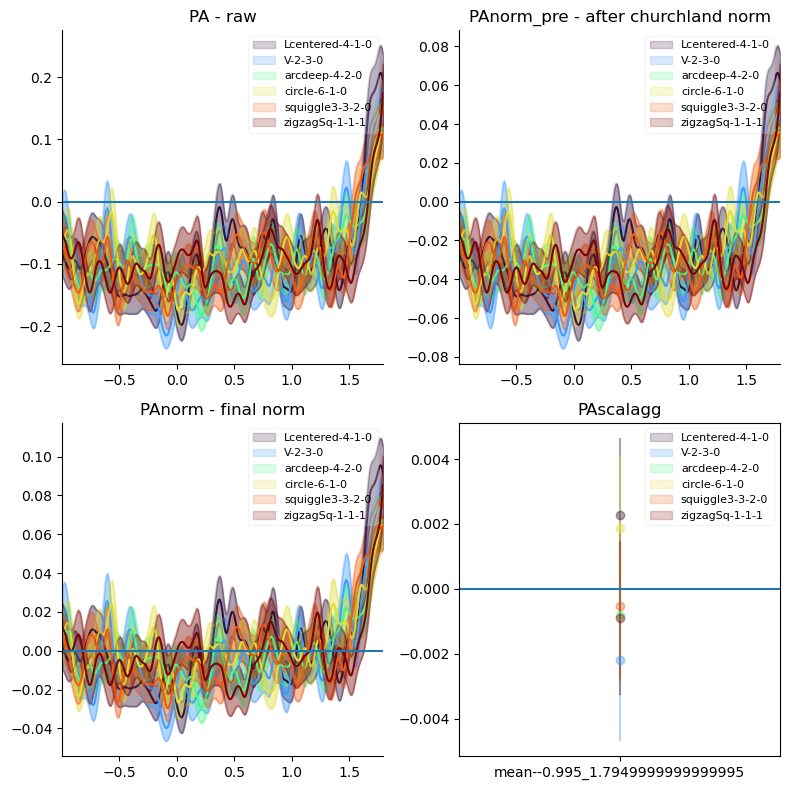

In [11]:
from neuralmonkey.classes.population_mult import dfallpa_preprocess_fr_normalization
# fr_normalization_method = "each_time_bin"
fr_normalization_method = "across_time_bins"
plot_savedir = "/tmp"
dfallpa_preprocess_fr_normalization(DFallpa, fr_normalization_method, plot_savedir)

### [IGNORE THE METHODS BELOW]

### (1b) FR normalization, apply across events


In [12]:

# Prune to chans that are common across pa for each bregion (intersection of chans)|
dfpa_match_chans_across_pa_each_bregion(DFallpa)


NameError: name 'dfpa_match_chans_across_pa_each_bregion' is not defined

##### Method 2 - Concat events (for each bregion) and normalize all same way


In [ ]:
from neuralmonkey.classes.population_mult import dfpa_concat_normalize_fr_split_multbregion
# fr_normalization_method = "each_time_bin"
fr_normalization_method = "across_time_bins"
dfpa_concat_normalize_fr_split_multbregion(DFallpa)


##### Method 3 - concat events (flexible version, only constrianed to have same n chans across PA)

In [ ]:
from neuralmonkey.classes.population_mult import dfpa_concat_normalize_fr_split_multbregion_flex
fr_mean_subtract_method = "across_time_bins"
# fr_mean_subtract_method = "each_time_bin"
PLOT=False

pa = DFallpa["pa"].values[0]
pa.plotNeurHeat(0)

dfpa_concat_normalize_fr_split_multbregion_flex(DFallpa, fr_mean_subtract_method, PLOT)

pa = DFallpa["pa"].values[0]
pa.plotNeurHeat(0)

### [Optionally] get a single PA concatted across events (for each bregion)


In [ ]:
from neuralmonkey.classes.population_mult import dfpa_group_and_split
DFallpaConcat = dfpa_group_and_split(DFallpa, ["event"], concat_dim="times", pa_column="pa_pca")

KeyError: 'pa_pca'

# Plot behavior

### Plot strokes (behavior) on this trial, overlaid on the task image

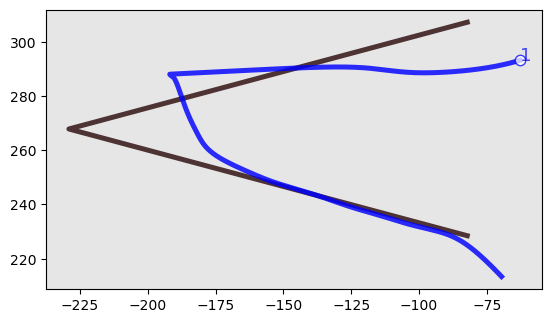

In [14]:
dflab = pa.Xlabels["trials"]

Tkbeh_stkbeh = dflab.iloc[trial]["Tkbeh_stkbeh"]
Tkbeh_stktask = dflab.iloc[trial]["Tkbeh_stktask"]

strokes_beh = [tk["Prim"].Stroke() for tk in Tkbeh_stkbeh.Tokens]
strokes_task = [tk["Prim"].Stroke() for tk in Tkbeh_stktask.Tokens]

fig, ax = plt.subplots()
from pythonlib.drawmodel.strokePlots import plotDatStrokesWrapper, plotDatStrokes

# # Plot the task strokes
# plotDatStrokes(strokes_task, ax, mark_stroke_onset=False, color="k")

# # Overlay each beh stroke
# plotDatStrokes(strokes_beh, ax, mark_stroke_onset=True, add_stroke_number=True)

# Plot the task strokes
plotDatStrokes(strokes_task, ax, clean_task=True)

# Overlay each beh stroke
plotDatStrokes(strokes_beh, ax, clean_ordered_ordinal=True)


# Analyze and plot neural data

##### PA has many helper functions to preprocess and plot the data. 

In [15]:
# Pick a random channel
chan = pa.Chans[4]


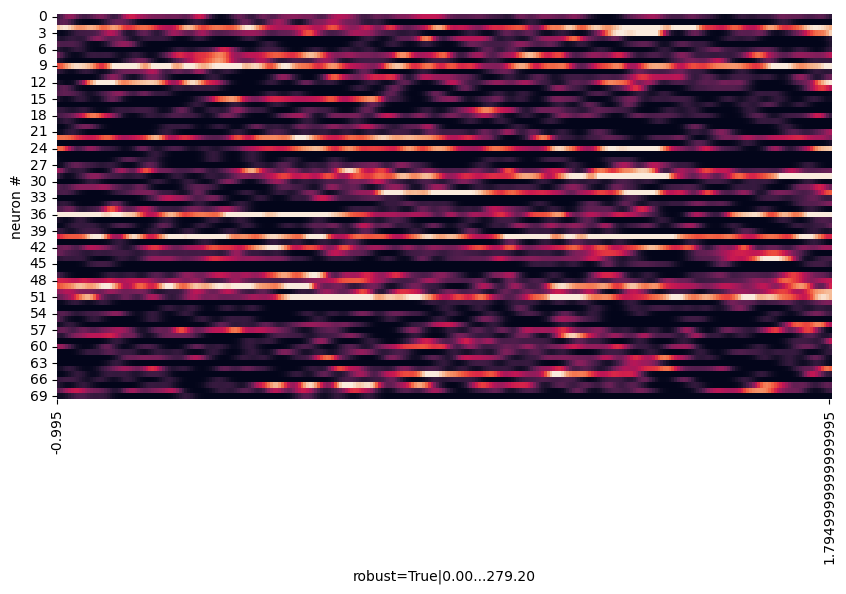

In [16]:
# Plot heatmap of data for a single trial
trial = pa.Trials[0]
pa.plotNeurHeat(trial)

dict_values([array([0.18995, 0.07176, 0.23217, 1.     ]), array([0.24427, 0.60937, 0.99697, 1.     ]), array([0.27597, 0.97092, 0.51653, 1.     ]), array([0.88331, 0.86553, 0.21719, 1.     ]), array([0.94084, 0.35566, 0.07031, 1.     ]), array([0.4796 , 0.01583, 0.01055, 1.     ])])

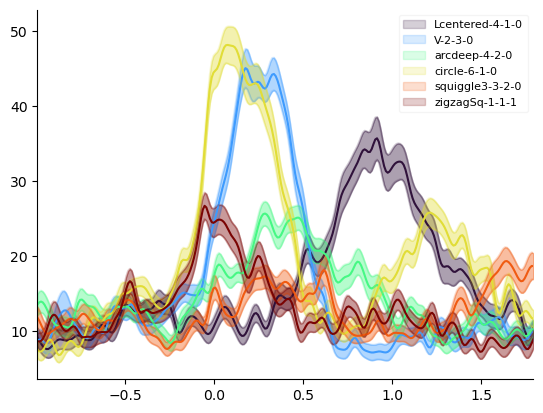

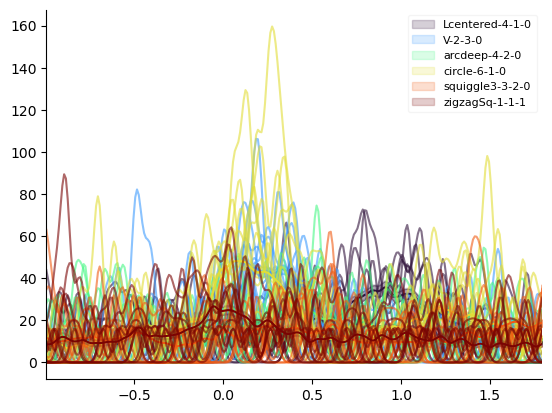

In [17]:
# Plot average acrtivit for each shape
fig, ax = plt.subplots()
pa.plotwrapper_smoothed_fr_split_by_label("trials", "seqc_0_shape", ax, chan=chan)


fig, ax = plt.subplots()
pa.plotwrapper_smoothed_fr_split_by_label("trials", "seqc_0_shape", ax, chan=chan, plot_indiv=True)


In [18]:
# Example processing. Here this picks out just a smaller time winodw
print("Times, before slicing: ", pa.Times)

twind = [-0.35, -0.3] # window: to only keep times within this window
pa_slice = pa.slice_by_dim_values_wrapper("times", twind)

print("Times, after slicing:", pa_slice.Times)

Times, before slicing:  [-0.995 -0.985 -0.975 -0.965 -0.955 -0.945 -0.935 -0.925 -0.915 -0.905
 -0.895 -0.885 -0.875 -0.865 -0.855 -0.845 -0.835 -0.825 -0.815 -0.805
 -0.795 -0.785 -0.775 -0.765 -0.755 -0.745 -0.735 -0.725 -0.715 -0.705
 -0.695 -0.685 -0.675 -0.665 -0.655 -0.645 -0.635 -0.625 -0.615 -0.605
 -0.595 -0.585 -0.575 -0.565 -0.555 -0.545 -0.535 -0.525 -0.515 -0.505
 -0.495 -0.485 -0.475 -0.465 -0.455 -0.445 -0.435 -0.425 -0.415 -0.405
 -0.395 -0.385 -0.375 -0.365 -0.355 -0.345 -0.335 -0.325 -0.315 -0.305
 -0.295 -0.285 -0.275 -0.265 -0.255 -0.245 -0.235 -0.225 -0.215 -0.205
 -0.195 -0.185 -0.175 -0.165 -0.155 -0.145 -0.135 -0.125 -0.115 -0.105
 -0.095 -0.085 -0.075 -0.065 -0.055 -0.045 -0.035 -0.025 -0.015 -0.005
  0.005  0.015  0.025  0.035  0.045  0.055  0.065  0.075  0.085  0.095
  0.105  0.115  0.125  0.135  0.145  0.155  0.165  0.175  0.185  0.195
  0.205  0.215  0.225  0.235  0.245  0.255  0.265  0.275  0.285  0.295
  0.305  0.315  0.325  0.335  0.345  0.355  0.365  0.

In [19]:
# 1. First slice to time winodw, then take mean over time, i.e. a single time average
twind = (0.1, 0.5)
pa_sliced = pa.slice_by_dim_values_wrapper("times", twind)
pa_mean = pa_sliced.agg_wrapper("times")

print("Compare and see that times are binned")
print("-- original:", pa.Times, "... data shape: ", pa.X.shape)
print("-- sliced:", pa_sliced.Times, "... data shape: ", pa_sliced.X.shape)
print("-- mean:", pa_mean.Times, "... data shape: ", pa_mean.X.shape)


Compare and see that times are binned
-- original: [-0.995 -0.985 -0.975 -0.965 -0.955 -0.945 -0.935 -0.925 -0.915 -0.905
 -0.895 -0.885 -0.875 -0.865 -0.855 -0.845 -0.835 -0.825 -0.815 -0.805
 -0.795 -0.785 -0.775 -0.765 -0.755 -0.745 -0.735 -0.725 -0.715 -0.705
 -0.695 -0.685 -0.675 -0.665 -0.655 -0.645 -0.635 -0.625 -0.615 -0.605
 -0.595 -0.585 -0.575 -0.565 -0.555 -0.545 -0.535 -0.525 -0.515 -0.505
 -0.495 -0.485 -0.475 -0.465 -0.455 -0.445 -0.435 -0.425 -0.415 -0.405
 -0.395 -0.385 -0.375 -0.365 -0.355 -0.345 -0.335 -0.325 -0.315 -0.305
 -0.295 -0.285 -0.275 -0.265 -0.255 -0.245 -0.235 -0.225 -0.215 -0.205
 -0.195 -0.185 -0.175 -0.165 -0.155 -0.145 -0.135 -0.125 -0.115 -0.105
 -0.095 -0.085 -0.075 -0.065 -0.055 -0.045 -0.035 -0.025 -0.015 -0.005
  0.005  0.015  0.025  0.035  0.045  0.055  0.065  0.075  0.085  0.095
  0.105  0.115  0.125  0.135  0.145  0.155  0.165  0.175  0.185  0.195
  0.205  0.215  0.225  0.235  0.245  0.255  0.265  0.275  0.285  0.295
  0.305  0.315  0.325  0.3

In [20]:
# 2. binning time windows
binsize = 0.1
binslide = 0.02
pa_binned = pa.agg_by_time_windows_binned(binsize, binslide)
    
print("Compare and see that times are binned")
print("-- original:", pa.Times, "... data shape: ", pa.X.shape)
print("-- sliced:", pa_binned.Times, "... data shape: ", pa_binned.X.shape)


Compare and see that times are binned
-- original: [-0.995 -0.985 -0.975 -0.965 -0.955 -0.945 -0.935 -0.925 -0.915 -0.905
 -0.895 -0.885 -0.875 -0.865 -0.855 -0.845 -0.835 -0.825 -0.815 -0.805
 -0.795 -0.785 -0.775 -0.765 -0.755 -0.745 -0.735 -0.725 -0.715 -0.705
 -0.695 -0.685 -0.675 -0.665 -0.655 -0.645 -0.635 -0.625 -0.615 -0.605
 -0.595 -0.585 -0.575 -0.565 -0.555 -0.545 -0.535 -0.525 -0.515 -0.505
 -0.495 -0.485 -0.475 -0.465 -0.455 -0.445 -0.435 -0.425 -0.415 -0.405
 -0.395 -0.385 -0.375 -0.365 -0.355 -0.345 -0.335 -0.325 -0.315 -0.305
 -0.295 -0.285 -0.275 -0.265 -0.255 -0.245 -0.235 -0.225 -0.215 -0.205
 -0.195 -0.185 -0.175 -0.165 -0.155 -0.145 -0.135 -0.125 -0.115 -0.105
 -0.095 -0.085 -0.075 -0.065 -0.055 -0.045 -0.035 -0.025 -0.015 -0.005
  0.005  0.015  0.025  0.035  0.045  0.055  0.065  0.075  0.085  0.095
  0.105  0.115  0.125  0.135  0.145  0.155  0.165  0.175  0.185  0.195
  0.205  0.215  0.225  0.235  0.245  0.255  0.265  0.275  0.285  0.295
  0.305  0.315  0.325  0.3

# Dimensionality reduction (PCA)

### Run for a single event

##### (1) PCA using trial data

In [22]:
from neuralmonkey.classes.population_mult import extract_single_pa
bregion = "PMv"
event="06_on_strokeidx_0"
PA = extract_single_pa(DFallpa, bregion, None, event=event)

In [24]:
tbin_dur = 0.1
tbin_slide = 0.01
npcs_keep_force = 15
if True:
    # To plot things for each pc run
    plot_pca_explained_var_path = f"/tmp/plot_pca_explained_var_path-{bregion}.pdf"
    plot_loadings_path = f"/tmp/plot_loadings_path-{bregion}.pdf"
else:
    plot_pca_explained_var_path = None
    plot_loadings_path = None
norm_subtract_single_mean_each_chan = True
_, PAfinal1, _, _, _ = PA.dataextract_state_space_decode_flex(None, tbin_dur, tbin_slide, 
                                                        "chans_x_trials_x_times",
                                                        pca_reduce=True,
                                                        plot_pca_explained_var_path=plot_pca_explained_var_path, 
                                                        plot_loadings_path=plot_loadings_path,
                                                        norm_subtract_single_mean_each_chan=norm_subtract_single_mean_each_chan,
                                                        npcs_keep_force=npcs_keep_force)
plt.close("all")


Doing PCA


##### (2) PCA on trial-averaged data

In [25]:
import os

Doing PCA


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


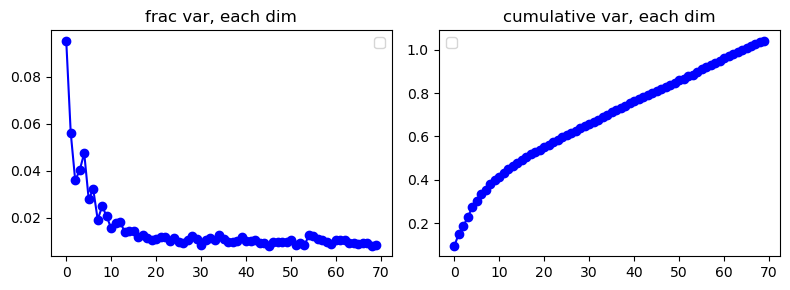

In [26]:
savedir_plots = f"/tmp/pca_plots"
os.makedirs(savedir_plots, exist_ok=True)

var_pca = "seqc_0_shape"
vars_grouping = None
n_pcs_subspace_max = 15

# Fixed params
raw_subtract_mean_each_timepoint = False
pca_subtract_mean_each_level_grouping = True
n_min_per_lev_lev_others = 5
prune_min_n_levs = 2

# PCA time window -- use specific smaller window for fitting PC
pca_twind = (0.1, 1.0)
pca_tbindur = 0.1
pca_tbin_slice = 0.01

# Data projection time window -- keep larger window for data
proj_twind = (-0.5, 1.0)
proj_tbindur = 0.1
proj_tbin_slice = 0.01

Xredu, PAfinal2, stats_redu, Xfinal_before_redu, pca, PAraw = PA.dataextract_pca_demixed_subspace(var_pca, vars_grouping,
                                                pca_twind, pca_tbindur,
                                                savedir_plots=savedir_plots,
                                                raw_subtract_mean_each_timepoint=raw_subtract_mean_each_timepoint,
                                                pca_subtract_mean_each_level_grouping=pca_subtract_mean_each_level_grouping,
                                                n_min_per_lev_lev_others=n_min_per_lev_lev_others, prune_min_n_levs = prune_min_n_levs,
                                                n_pcs_subspace_max = n_pcs_subspace_max,
                                                do_pca_after_project_on_subspace=False,
                                                PLOT_STEPS=False, SANITY=False,
                                                reshape_method="chans_x_trials_x_times",
                                                pca_tbin_slice=pca_tbin_slice, return_raw_data=True,
                                                proj_twind = proj_twind, proj_tbindur = proj_tbindur, 
                                                proj_tbin_slice = proj_tbin_slice)



ValueError: 6 is not in list

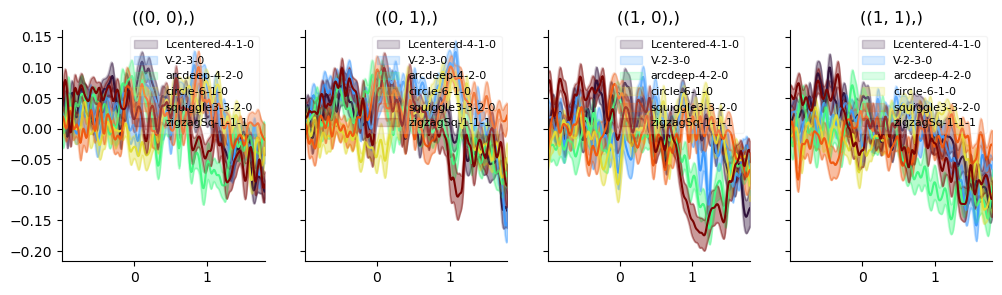

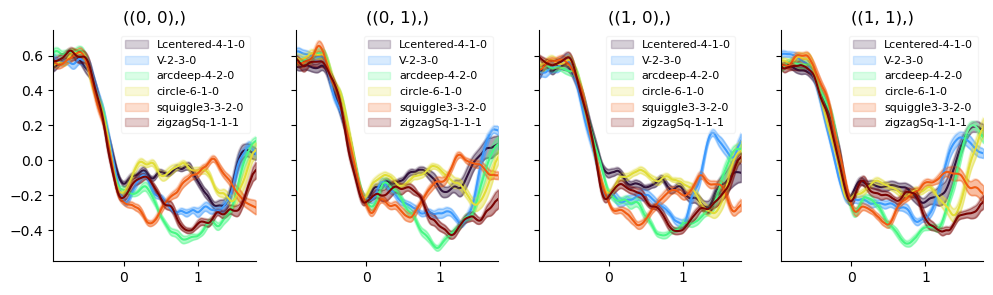

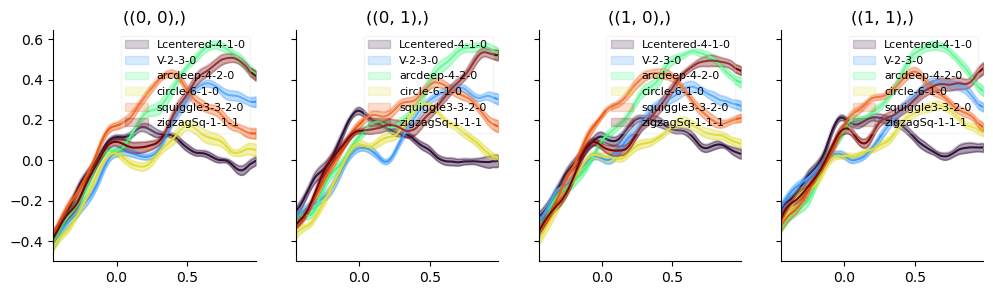

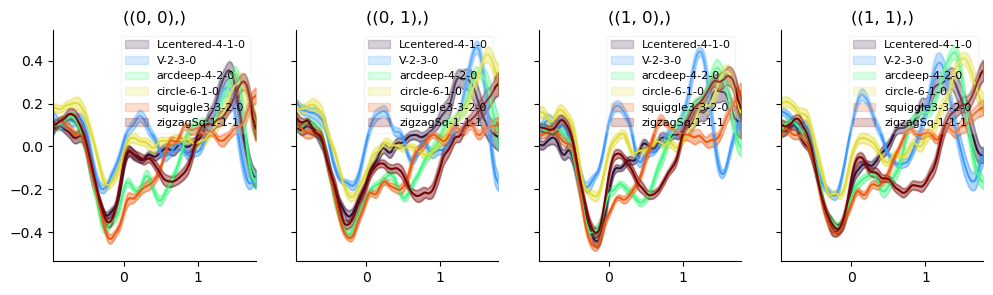

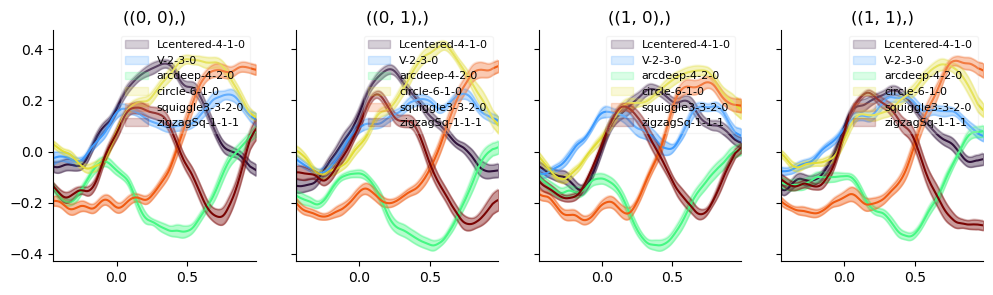

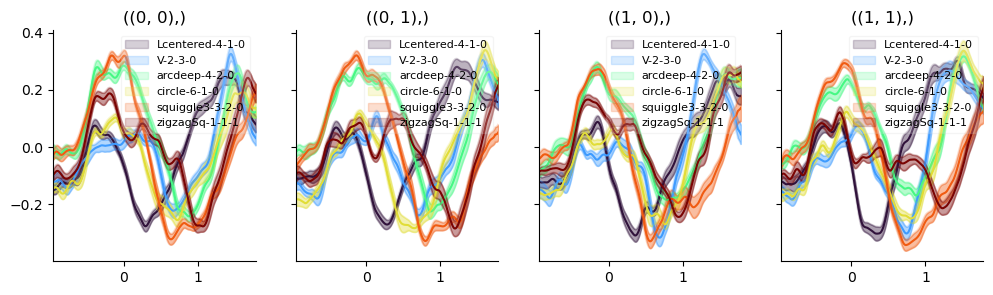

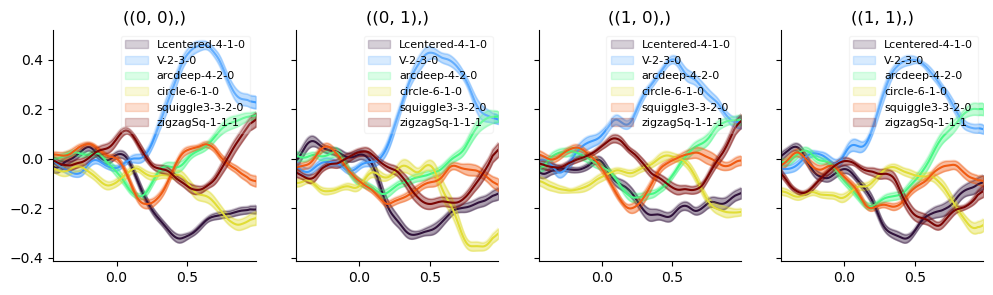

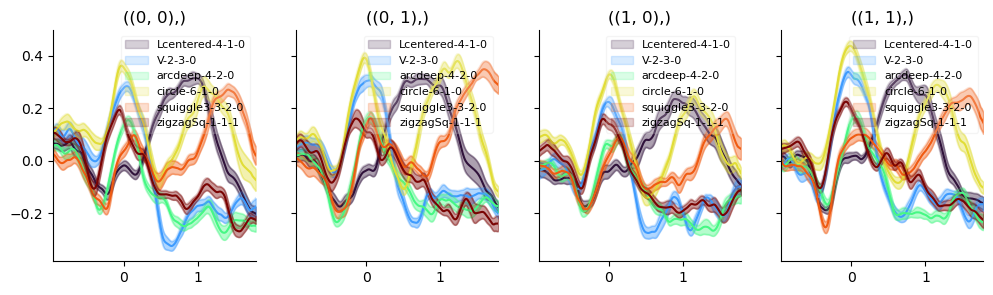

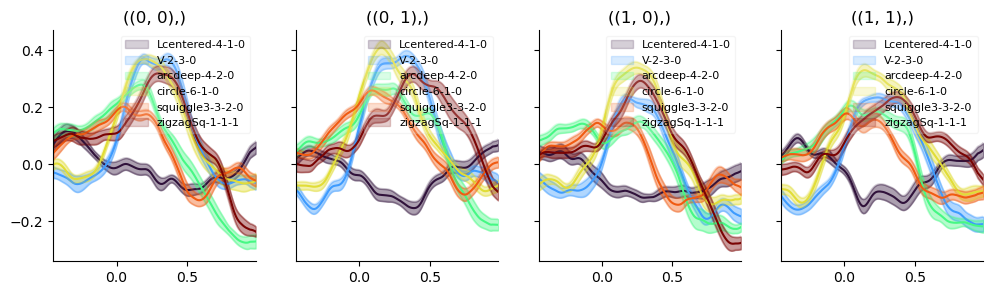

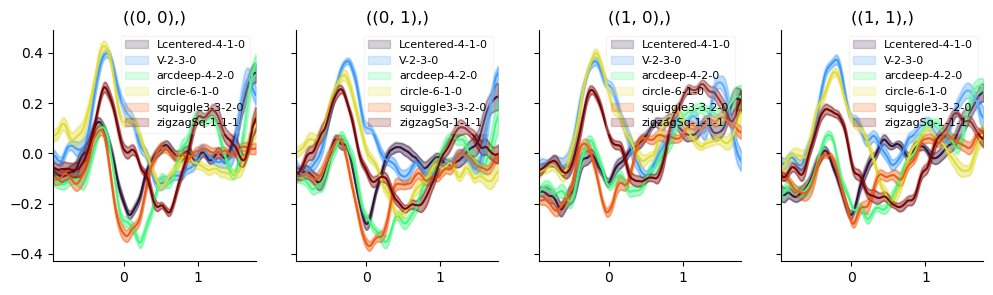

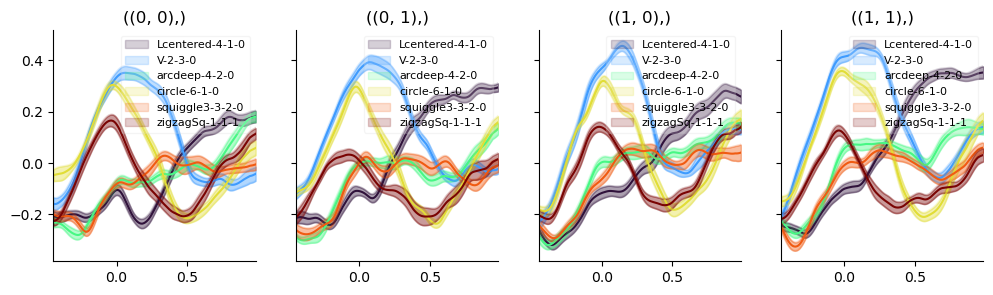

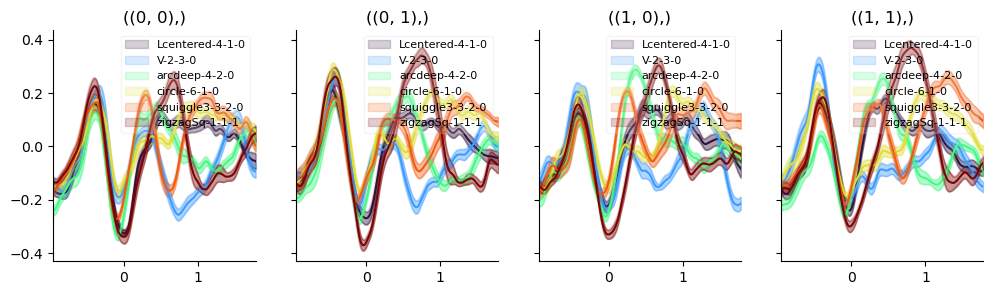

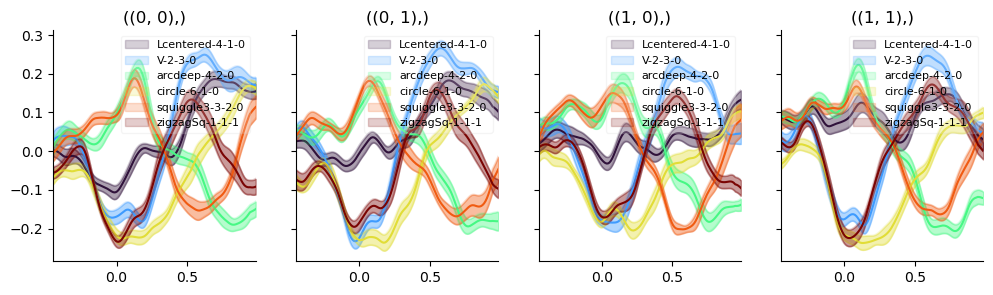

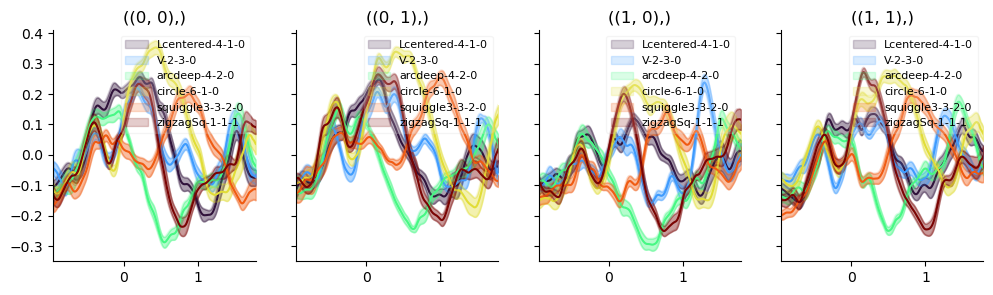

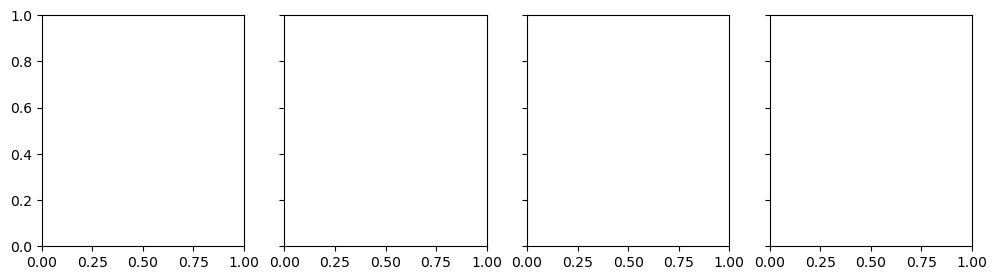

In [27]:
# Comapre the results
# (i) raw data, pick a random channel
chan = PA.Chans[0]
PA.plotwrapper_smoothed_fr_split_by_label_and_subplots(chan, var_pca, ["seqc_0_loc"])

for pc in range(8):
    # (ii) PCa on trials
    PAfinal1.plotwrapper_smoothed_fr_split_by_label_and_subplots(pc, var_pca, ["seqc_0_loc"])
    # (iii) PCa on mean data
    PAfinal2.plotwrapper_smoothed_fr_split_by_label_and_subplots(pc, var_pca, ["seqc_0_loc"])

##### Run a single PCA across all events

In [28]:
from neuralmonkey.classes.population_mult import dfpa_concat_pca_split_multbregion


In [29]:

# Method 1 -- do PCA on trial-level data
sm_dur=0.1
sm_slide=0.01
npcs_keep_force=15
pca_method = "trials"
dfpa_concat_pca_split_multbregion(DFallpa, sm_dur=sm_dur, sm_slide=sm_slide,
                                      npcs_keep_force=npcs_keep_force,
                                      pca_method = pca_method)

Running ..  M1
Doing PCA
Running ..  PMv
Doing PCA
Running ..  PMd
Doing PCA
Running ..  dlPFC
Doing PCA
Running ..  vlPFC
Doing PCA
Running ..  FP
Doing PCA
Running ..  SMA
Doing PCA
Running ..  preSMA
Doing PCA


In [ ]:
# Method 2 -- take mean over trials (--> one datapt per level of pcamean_var) and then do pca
sm_dur=0.1
sm_slide=0.01
npcs_keep_force=15
pca_method = "trial_means"
pcamean_var = "seqc_0_shape"
pcamean_vars_grouping = None
pcamean_pca_twind = (0.1, 1.2) 
dfpa_concat_pca_split_multbregion(DFallpa, sm_dur=sm_dur, sm_slide=sm_slide,
                                      npcs_keep_force=npcs_keep_force,
                                      pca_method = pca_method, 
                                      pcamean_var = pcamean_var, 
                                      pcamean_vars_grouping = pcamean_vars_grouping,
                                      pcamean_pca_twind = pcamean_pca_twind)

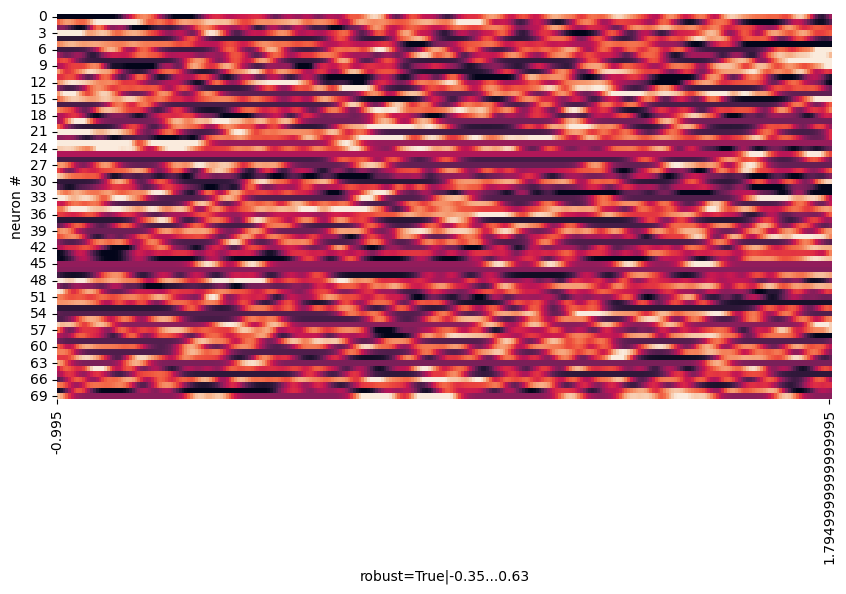

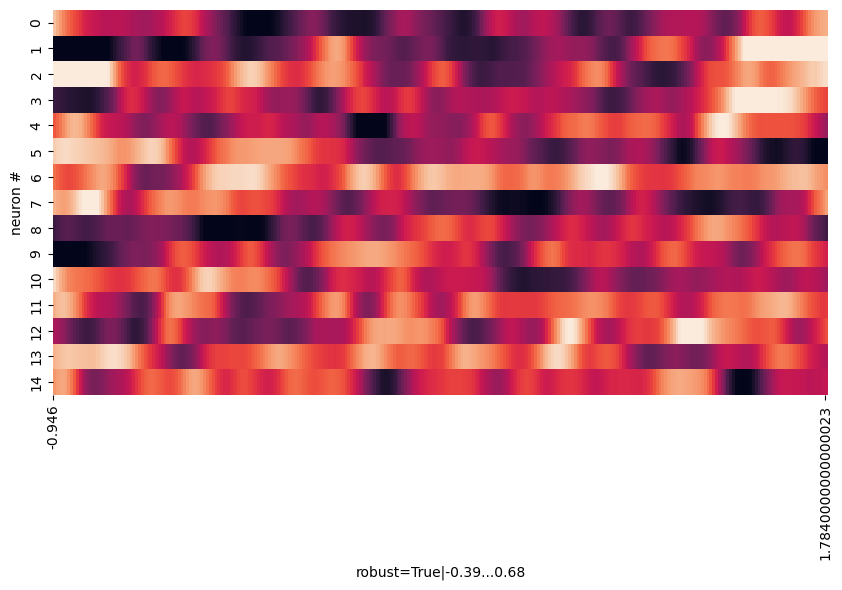

In [30]:
# Look at raw and PCA data for an example PA
ind =1
pa = DFallpa["pa"].values[ind]
pa_pca = DFallpa["pa_pca"].values[ind]

pa.plotNeurHeat(0)
pa_pca.plotNeurHeat(0)


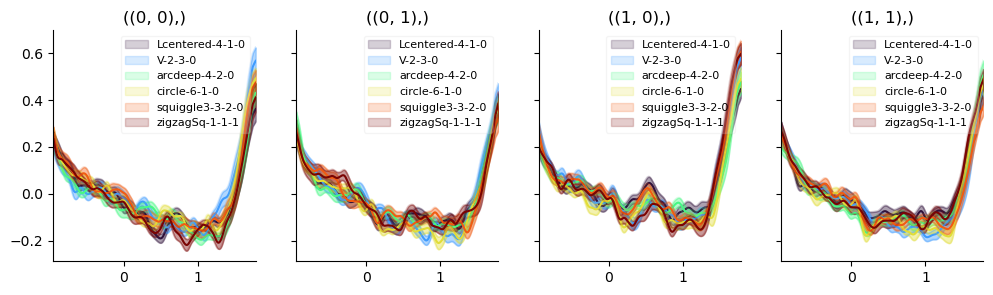

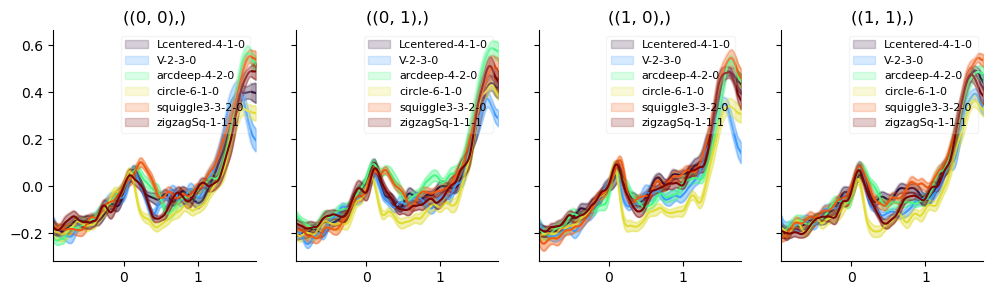

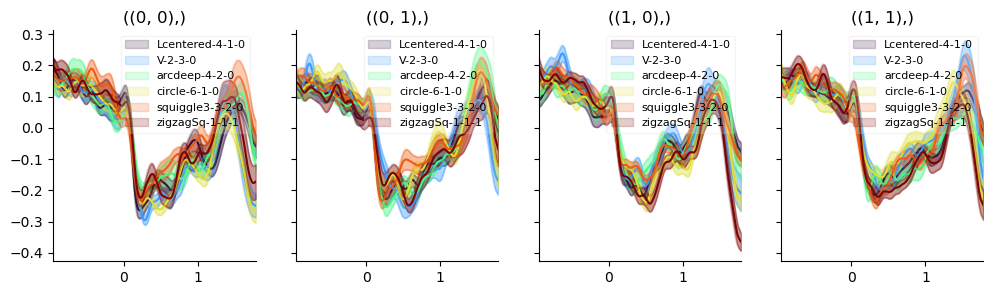

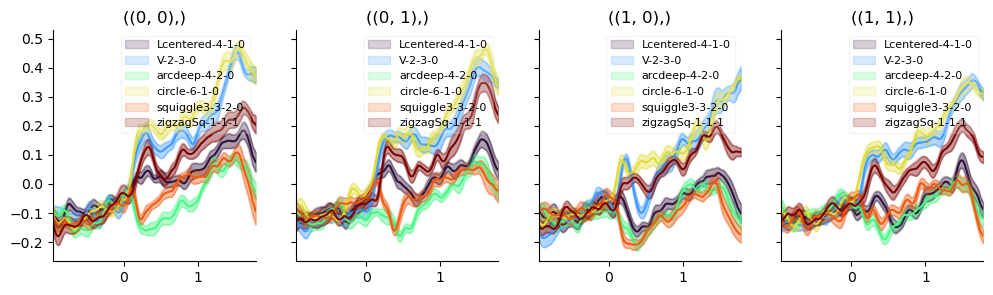

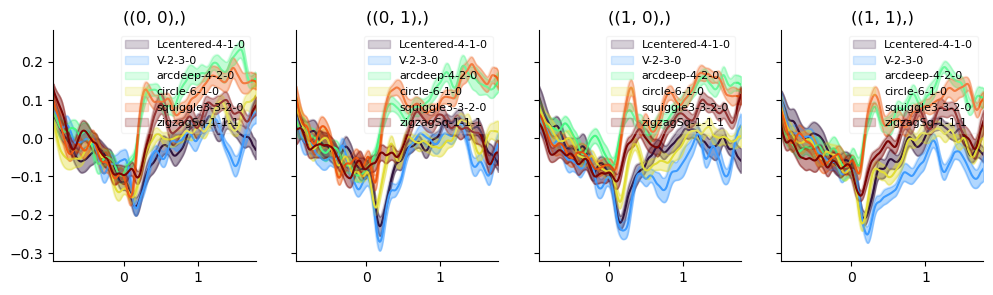

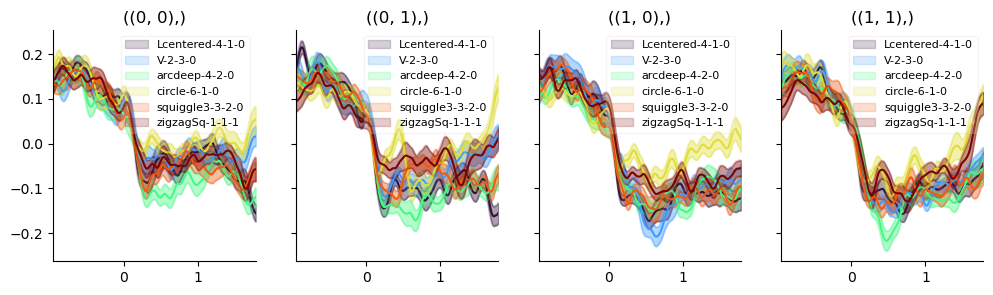

In [31]:
# Visaulize PC encoding of shape.
for pc in range(6):
    pa_pca.plotwrapper_smoothed_fr_split_by_label_and_subplots(pc, var_pca, ["seqc_0_loc"])


# Decoding shapes

This step takes in a representation of neural data and outputs a scalar score for how well you can decode "shape" from that data

Here, this example is using the raw data (dimensionality = number of channels). Could also use methods to reduce the dimensionality of this data, each time running through this decoding benchmark, to compare the different methods

### Make sure to normalize PA before running any modeling on it:

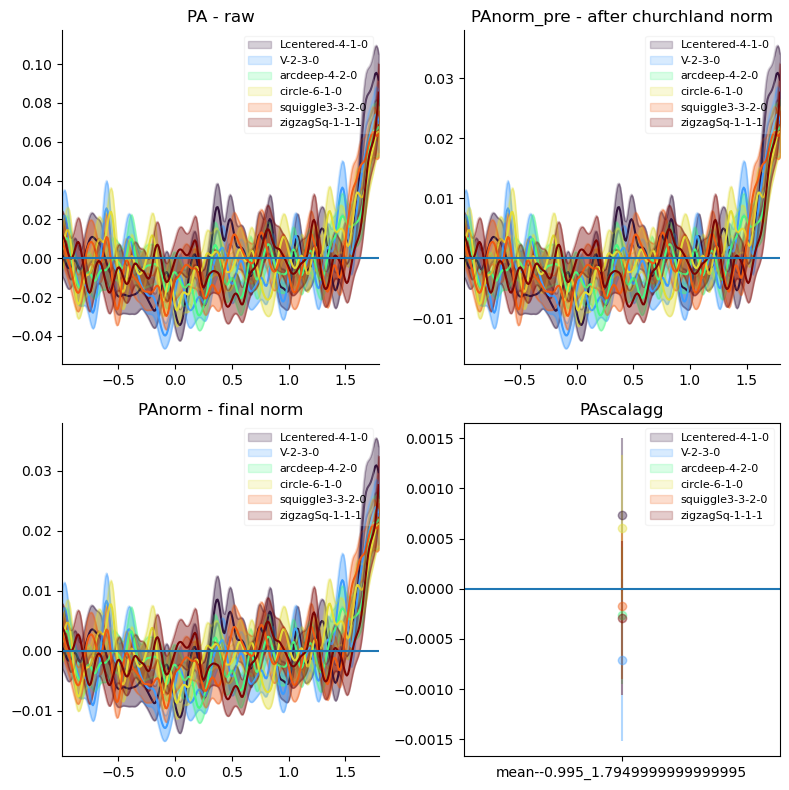

In [32]:
from neuralmonkey.classes.population_mult import dfallpa_preprocess_fr_normalization
# fr_normalization_method = "each_time_bin"
fr_normalization_method = "across_time_bins"
plot_savedir = "/tmp"
dfallpa_preprocess_fr_normalization(DFallpa, fr_normalization_method, plot_savedir)

In [ ]:
# list_panorm = []
# for pa in DFallpa["pa"].tolist():
#     from neuralmonkey.analyses.state_space_good import popanal_preprocess_scalar_normalization
#     PAnorm, PAscal, PAscalagg, fig, axes, groupdict = popanal_preprocess_scalar_normalization(pa, None, DO_AGG_TRIALS=False)
#     list_panorm.append(PAnorm)
# DFallpa["pa"] = list_panorm
# if "pa_norm" in DFallpa.columns:
#     del DFallpa["pa_norm"]

### PREPROCESS - factorize all relevant labels FIRST here.


In [33]:
from neuralmonkey.analyses.decode_good import preprocess_factorize_class_labels_ints
MAP_LABELS_TO_INT = preprocess_factorize_class_labels_ints(DFallpa)

(('Lcentered-UL-UL', (0, 1)),)  ---  0
(('zigzagSq-LL-0.0', (0, 1)),)  ---  1
(('Lcentered-UL-UL', (1, 1)),)  ---  2
(('arcdeep-DD-DD', (1, 0)),)  ---  3
(('V-RR-RR', (0, 0)),)  ---  4
(('squiggle3-LL-1.0', (0, 1)),)  ---  5
(('squiggle3-LL-1.0', (1, 0)),)  ---  6
(('Lcentered-UL-UL', (1, 0)),)  ---  7
(('circle-XX-XX', (0, 1)),)  ---  8
(('V-RR-RR', (1, 0)),)  ---  9
(('Lcentered-UL-UL', (0, 0)),)  ---  10
(('V-RR-RR', (1, 1)),)  ---  11
(('circle-XX-XX', (1, 0)),)  ---  12
(('arcdeep-DD-DD', (0, 1)),)  ---  13
(('circle-XX-XX', (0, 0)),)  ---  14
(('squiggle3-LL-1.0', (1, 1)),)  ---  15
(('circle-XX-XX', (1, 1)),)  ---  16
(('V-RR-RR', (0, 1)),)  ---  17
(('zigzagSq-LL-0.0', (1, 0)),)  ---  18
(('arcdeep-DD-DD', (1, 1)),)  ---  19
(('squiggle3-LL-1.0', (0, 0)),)  ---  20
(('arcdeep-DD-DD', (0, 0)),)  ---  21
(('zigzagSq-LL-0.0', (0, 0)),)  ---  22
(('zigzagSq-LL-0.0', (1, 1)),)  ---  23
((0, 1),)  ---  24
((1, 1),)  ---  25
((1, 0),)  ---  26
((0, 0),)  ---  27
('Lcentered-UL-UL',)  

### 1) Default: Time-resolved decoding

In [34]:
# Simplest model, simply try to decode a single variable at each time bin, without caring about other possibly correlated variables.

In [35]:
SAVEDIR_ANALYSIS = "/tmp/decoding"
import os

In [36]:
SAVEDIR = f"{SAVEDIR_ANALYSIS}/1_time_resolved"
os.makedirs(SAVEDIR, exist_ok=True)
print(SAVEDIR)

n_min_trials = 6

from neuralmonkey.analyses.decode_good import decodewrap_categorical_timeresolved_singlevar, decodewrapouterloop_categorical_timeresolved

# list_vars_decode = ["seqc_0_shape", "seqc_0_loc"]
# list_vars_decode = ["seqc_0_shape"]
list_vars_decode = ["seqc_0_shape"]
# list_vars_decode = ["seqc_2_shape"]
# list_vars_decode = ["shape_is_novel_all"]

# PARAMS
time_bin_size = 0.2 # binsize, to average over to get population vector of neural activity
slide = 0.2 # to slide the bin.
max_nsplits = 2 # n times to do cross-validation.

DFRES = decodewrapouterloop_categorical_timeresolved(DFallpa, list_vars_decode, SAVEDIR, time_bin_size, slide, n_min_trials,
                                                     max_nsplits=max_nsplits)


/tmp/decoding/1_time_resolved
--- [filter_by_min_n], checking var= seqc_0_shape
level 0, keeping, n=72
level 1, keeping, n=65
level 2, keeping, n=73
level 3, keeping, n=66
level 4, keeping, n=76
level 5, keeping, n=73
(removing this many indices):  0
[Doing upsample] Across levels, nmin_dat / nmax_dat: 32 38
[Doing upsample] Across levels, nmin_dat / nmax_dat: 32 38
[Doing upsample] Across levels, nmin_dat / nmax_dat: 32 38
[Doing upsample] Across levels, nmin_dat / nmax_dat: 32 38
[Doing upsample] Across levels, nmin_dat / nmax_dat: 32 38
[Doing upsample] Across levels, nmin_dat / nmax_dat: 32 38
[Doing upsample] Across levels, nmin_dat / nmax_dat: 32 38
[Doing upsample] Across levels, nmin_dat / nmax_dat: 32 38
[Doing upsample] Across levels, nmin_dat / nmax_dat: 32 38
[Doing upsample] Across levels, nmin_dat / nmax_dat: 32 38
[Doing upsample] Across levels, nmin_dat / nmax_dat: 32 38
[Doing upsample] Across levels, nmin_dat / nmax_dat: 32 38
[Doing upsample] Across levels, nmin_dat 

KeyboardInterrupt: 

### 2) Cross-condition decoding

In [ ]:
# Ask whether a decoder for variable X, trained on each level of variable Y, can generalize to the other levels of variable Y.

In [ ]:
# For each time bin, decode shape genearlizing across location

SAVEDIR = f"{SAVEDIR_ANALYSIS}/2_cross_condition_decoding"
os.makedirs(SAVEDIR, exist_ok=True)
print(SAVEDIR)

from neuralmonkey.analyses.decode_good import decodewrap_categorical_timeresolved_cross_condition, decodewrapouterloop_categorical_timeresolved_cross_condition

filtdict = None
separate_by_task_kind = True

# PARAMS

# # Context
# list_var_decode = [
#     "seqc_0_shape",
#     "shape-fixation",
#     "is-fixated-on-seqc0shape",
#     "is-fixated-on-seqc0shape",
#     "is-fixated-on-seqc0shape",
#     "is-fixated-on-seqc0shape",
# ]
# list_vars_conj = [
#     ["shape-macrosaccade-index", "seqc_0_loc_on_clust", "shape-fixation", "loc-fixation", "task_kind"],
#     ["shape-macrosaccade-index", "loc-fixation", "seqc_0_shape", "seqc_0_loc_on_clust", "task_kind"],
#     ["shape-macrosaccade-index", "seqc_0_shape", "loc-fixation", "task_kind"],
#     ["shape-macrosaccade-index", "seqc_0_shape", "seqc_0_loc_on_clust", "task_kind"],
#     ["shape-macrosaccade-index", "shape-fixation", "loc-fixation", "task_kind"],
#     ["shape-macrosaccade-index", "shape-fixation", "seqc_0_loc_on_clust", "task_kind"],
# ]
# Context
list_var_decode = [
    "seqc_0_shape",
    "seqc_0_loc",
]
list_vars_conj = [
    ["task_kind", "seqc_0_loc"],
    ["task_kind", "seqc_0_shape"],
]

time_bin_size = 0.2
slide = 0.2
subtract_mean_vars_conj = False
DFRES = decodewrapouterloop_categorical_timeresolved_cross_condition(DFallpa, list_var_decode,
                                                     list_vars_conj,
                                                     SAVEDIR, time_bin_size=time_bin_size, slide=slide,
                                                     subtract_mean_vars_conj=subtract_mean_vars_conj,
                                                                     filtdict=filtdict,
                                                                     separate_by_task_kind=separate_by_task_kind)



### 2b) Within-condition decoding. Separate decoder for each level of other var (then take average over decoders). Useful to controlling for variables

In [ ]:
# Decode variable X by building and scoring separate decoders conditioned on each level of variable Y.

In [ ]:
from neuralmonkey.analyses.decode_good import decodewrapouterloop_categorical_timeresolved_within_condition

SAVEDIR = f"{SAVEDIR_ANALYSIS}/3_within_condition_decoding"
os.makedirs(SAVEDIR, exist_ok=True)
print(SAVEDIR)

# PARAMS
separate_by_task_kind = True

# RUns
max_nsplits = 2
time_bin_size = 0.2
slide = 0.2

# PARAMS
DFRES = decodewrapouterloop_categorical_timeresolved_within_condition(DFallpa, list_var_decode,
                                                     list_vars_conj,
                                                    SAVEDIR, time_bin_size=time_bin_size, slide=slide, filtdict=filtdict,
                                                                      separate_by_task_kind=separate_by_task_kind)


# Dim reduction and State space plots

In [37]:
SAVEDIR_ANALYSIS = "/tmp/Diego_230630"

### Plot scalar values (time-mean within twindow)

In [38]:
from neuralmonkey.analyses.state_space_good import trajgood_construct_df_from_raw, trajgood_plot_colorby_splotby, trajgood_plot_colorby_splotby_scalar
from pythonlib.tools.plottools import savefig
from pythonlib.globals import PATH_ANALYSIS_OUTCOMES
import matplotlib.pyplot as plt
import os
from neuralmonkey.analyses.state_space_good import dimredgood_nonlinear_embed_data

### USER PARAMS
tbin_dur = 0.1
tbin_slide = 0.1
umap_n_neighbors = 45
pca_frac_var_keep = 0.8
n_min_per_levo= 5
list_twind_overall = [
    [-0.3, 0.0],
    [0.0, 0.3]
]
# METHOD = "umap"
METHOD = "umap"
list_var_color_var_subplot = [
    ["seqc_0_shape", ("seqc_0_loc", "task_kind")],
]

LIST_DIMS = [(0,1)]

### HARD PARAMS
reshape_method = "trials_x_chanstimes"

for i, row in DFallpa.iterrows():
    pa = row["pa"]
    br = row["bregion"]
    wl = row["which_level"]
    ev = row["event"]
    tw = row["twind"]

    for twind_overall in list_twind_overall:
        
        ###################### SCALAR DATA
        # Extract data
        X, _, pathis, _, _  = pa.dataextract_state_space_decode_flex(twind_overall, tbin_dur, tbin_slide, reshape_method,
                                                           pca_reduce=True, pca_frac_var_keep=pca_frac_var_keep)
        dflab = pathis.Xlabels["trials"]
        
        if METHOD=="umap":
            # Embed data
            Xredu, _ = dimredgood_nonlinear_embed_data(X, METHOD=METHOD, n_components=2, umap_n_neighbors=umap_n_neighbors)
        elif METHOD=="pca":
            Xredu = X
        else:
            print(METHOD)
            assert False

        ##### Plot scalars
        savedir = f"{SAVEDIR_ANALYSIS}/scalar/{br}-{ev}-twind={'_'.join([str(t) for t in twind_overall])}-METHOD={METHOD}"
        print(savedir)
        os.makedirs(savedir, exist_ok=True)

        for var_color, var_subplot in list_var_color_var_subplot:
            from neuralmonkey.analyses.state_space_good import trajgood_plot_colorby_splotby_scalar_WRAPPER
            trajgood_plot_colorby_splotby_scalar_WRAPPER(Xredu, dflab, var_color, savedir,
                                     vars_subplot=var_subplot, list_dims=LIST_DIMS, n_min_per_levo=n_min_per_levo)
        plt.close("all")

Running PCA
cumvar 0.8 0.01
UMAP, Using this n_neighbors: 45 , nsamp = 425 , n_components:  2
/tmp/Diego_230630/scalar/M1-03_samp-twind=-0.3_0.0-METHOD=umap
fig: /tmp/Diego_230630/scalar/M1-03_samp-twind=-0.3_0.0-METHOD=umap/color=seqc_0_shape-sub=seqc_0_loc|task_kind-dims=(0, 1).pdf
Saving ...  /tmp/Diego_230630/scalar/M1-03_samp-twind=-0.3_0.0-METHOD=umap/color=seqc_0_shape-sub=seqc_0_loc|task_kind-dims=(0, 1).pdf
Running PCA
cumvar 0.8 0.01
UMAP, Using this n_neighbors: 45 , nsamp = 425 , n_components:  2
/tmp/Diego_230630/scalar/M1-03_samp-twind=0.0_0.3-METHOD=umap
fig: /tmp/Diego_230630/scalar/M1-03_samp-twind=0.0_0.3-METHOD=umap/color=seqc_0_shape-sub=seqc_0_loc|task_kind-dims=(0, 1).pdf
Saving ...  /tmp/Diego_230630/scalar/M1-03_samp-twind=0.0_0.3-METHOD=umap/color=seqc_0_shape-sub=seqc_0_loc|task_kind-dims=(0, 1).pdf
Running PCA
cumvar 0.8 0.01
UMAP, Using this n_neighbors: 45 , nsamp = 425 , n_components:  2
/tmp/Diego_230630/scalar/PMv-03_samp-twind=-0.3_0.0-METHOD=umap
fig: 

KeyboardInterrupt: 

### Plot trajectories (within time window)

Doing PCA
/tmp/Diego_230630/trajectories/M1-03_samp-twind=-0.2_0.6-METHOD=pca
Saving ...  /tmp/Diego_230630/trajectories/M1-03_samp-twind=-0.2_0.6-METHOD=pca/color=seqc_0_shape-sub=('seqc_0_loc', 'task_kind')-dims=(0, 1).pdf
Doing PCA
/tmp/Diego_230630/trajectories/PMv-03_samp-twind=-0.2_0.6-METHOD=pca
Saving ...  /tmp/Diego_230630/trajectories/PMv-03_samp-twind=-0.2_0.6-METHOD=pca/color=seqc_0_shape-sub=('seqc_0_loc', 'task_kind')-dims=(0, 1).pdf
Doing PCA
/tmp/Diego_230630/trajectories/PMd-03_samp-twind=-0.2_0.6-METHOD=pca
Saving ...  /tmp/Diego_230630/trajectories/PMd-03_samp-twind=-0.2_0.6-METHOD=pca/color=seqc_0_shape-sub=('seqc_0_loc', 'task_kind')-dims=(0, 1).pdf
Doing PCA
/tmp/Diego_230630/trajectories/dlPFC-03_samp-twind=-0.2_0.6-METHOD=pca
Saving ...  /tmp/Diego_230630/trajectories/dlPFC-03_samp-twind=-0.2_0.6-METHOD=pca/color=seqc_0_shape-sub=('seqc_0_loc', 'task_kind')-dims=(0, 1).pdf
Doing PCA
/tmp/Diego_230630/trajectories/vlPFC-03_samp-twind=-0.2_0.6-METHOD=pca
Saving ..

KeyboardInterrupt: 

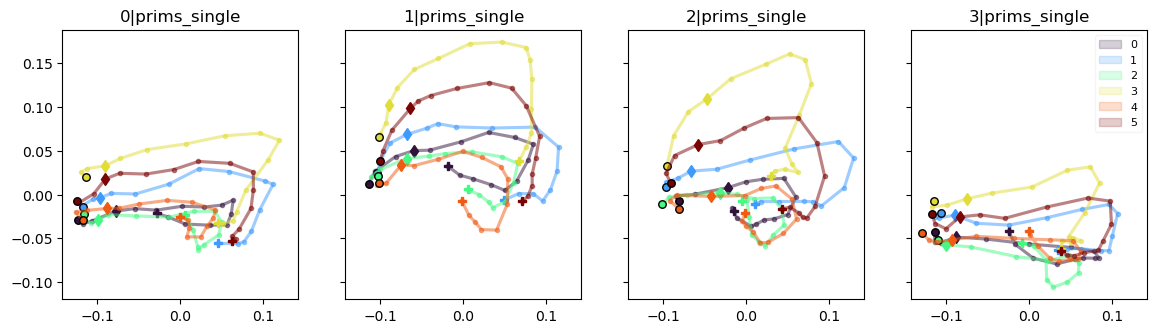

In [39]:
from neuralmonkey.analyses.state_space_good import trajgood_construct_df_from_raw, trajgood_plot_colorby_splotby, trajgood_plot_colorby_splotby_scalar
from pythonlib.tools.plottools import savefig
from pythonlib.globals import PATH_ANALYSIS_OUTCOMES
import os
from neuralmonkey.analyses.state_space_good import dimredgood_nonlinear_embed_data
import matplotlib.pyplot as plt

### USER PARAMS
tbin_dur = 0.1
tbin_slide = 0.1
umap_n_neighbors = 45
pca_frac_var_keep = 0.8
n_min_per_levo= 5
list_twind_overall = [
    [0.2, 0.6]
]
# METHOD = "umap"
METHOD = "pca"
list_var_color_var_subplot = [
    ["seqc_0_shape", ("seqc_0_loc", "task_kind")],
]
LIST_DIMS = [(0,1)]

### HARD PARAMS
reshape_method = "chans_x_trials_x_times"


for i, row in DFallpa.iterrows():
    pa = row["pa"]
    br = row["bregion"]
    wl = row["which_level"]
    ev = row["event"]
    tw = row["twind"]

    for twind_overall in list_twind_overall:
        
        ###################### TRAJECTORY DATA
        from neuralmonkey.analyses.state_space_good import trajgood_construct_df_from_raw, trajgood_plot_colorby_splotby
        from neuralmonkey.classes.population_mult import extract_single_pa
        twind_overall_traj = [-0.2, 0.6]
        tbin_dur = 0.05
        X, PApca, PAslice, pca, _ = pa.dataextract_state_space_decode_flex(twind_overall_traj, tbin_dur=tbin_dur, pca_reduce=True)
        
        if METHOD=="pca":
            Xredu = X
        else:
            print(METHOD)
            assert False, "code it"
            
        savedir = f"{SAVEDIR_ANALYSIS}/trajectories/{br}-{ev}-twind={'_'.join([str(t) for t in twind_overall_traj])}-METHOD=pca"
        print(savedir)
        os.makedirs(savedir, exist_ok=True)
        
        for var_color, var_subplot in list_var_color_var_subplot:
            for dims in LIST_DIMS:
                # 1) Construct dataframe
                if isinstance(var_color, (list, tuple)):
                    grpvars = list(var_color) + list(var_subplot)
                else:
                    grpvars = [var_color] + list(var_subplot)
                    
                labels = PApca.Xlabels["trials"].loc[:, grpvars] 
                labelvars = grpvars
                df = trajgood_construct_df_from_raw(X, PApca.Times, labels, labelvars)
                
                # 2) Plot
                # dims = (0,1) # pairs of dimensions to plot
                times_to_mark = [0.] # you can mark specific times on the plot. here marks the 0. sec mark.
                times_to_mark_markers = ["d"] # mark with a diamond ("d")
                time_bin_size = 0.05 # to make plot easier to visaulize, you can bin in time.
                
                fig, axes = trajgood_plot_colorby_splotby(df, var_color, var_subplot, dims, "traj", mean_over_trials=True,
                                              times_to_mark = times_to_mark, times_to_mark_markers = times_to_mark_markers,
                                              time_bin_size=time_bin_size)        
                
                path = f"{savedir}/color={var_color}-sub={var_subplot}-dims={dims[0], dims[1]}.pdf"
                print("Saving ... ", path)
                savefig(fig, path)
                
                plt.close("all")
            

In [40]:
sorted(dflab.columns.tolist())

['FEAT_num_strokes_beh',
 'FEAT_num_strokes_task',
 'INSTRUCTION_COLOR',
 'Tkbeh_stkbeh',
 'Tkbeh_stktask',
 'Tktask',
 'aborted',
 'bregion',
 'character',
 'donepos',
 'epoch',
 'epoch_orig',
 'epochset',
 'event',
 'event_time',
 'gridsize',
 'index_datapt',
 'loc_this_event',
 'origin',
 'probe',
 'seqc_0_angle',
 'seqc_0_angle_binned',
 'seqc_0_center_binned',
 'seqc_0_loc',
 'seqc_0_loc_on_clust',
 'seqc_0_locon',
 'seqc_0_locon_binned',
 'seqc_0_locx',
 'seqc_0_locy',
 'seqc_0_shape',
 'seqc_0_shapesem',
 'seqc_0_shapesemcat',
 'seqc_0_shapesemgrp',
 'seqc_1_angle',
 'seqc_1_angle_binned',
 'seqc_1_center_binned',
 'seqc_1_loc',
 'seqc_1_loc_on_clust',
 'seqc_1_locon',
 'seqc_1_locon_binned',
 'seqc_1_locx',
 'seqc_1_locy',
 'seqc_1_shape',
 'seqc_1_shapesem',
 'seqc_1_shapesemcat',
 'seqc_1_shapesemgrp',
 'seqc_2_angle',
 'seqc_2_angle_binned',
 'seqc_2_center_binned',
 'seqc_2_loc',
 'seqc_2_loc_on_clust',
 'seqc_2_locon',
 'seqc_2_locon_binned',
 'seqc_2_locx',
 'seqc_2_locy'

# Wrapper to make all state space plots

In [41]:
pa = DFallpa["pa"].values[0]
pa.Xlabels["trials"]

seqc_2_shapesem  seqc_6_locy  seqc_2_loc seqc_2_locon seqc_1_loc_on_clust  \
0               IGN          NaN          12   (nan, nan)                 IGN   
1               IGN          NaN          12   (nan, nan)                 IGN   
2               IGN          NaN          12   (nan, nan)                 IGN   
3               IGN          NaN          12   (nan, nan)                 IGN   
4               IGN          NaN          12   (nan, nan)                 IGN   
..              ...          ...         ...          ...                 ...   
420             IGN          NaN          12   (nan, nan)                 IGN   
421             IGN          NaN          12   (nan, nan)                 IGN   
422             IGN          NaN          12   (nan, nan)                 IGN   
423             IGN          NaN          12   (nan, nan)                 IGN   
424             IGN          NaN          12   (nan, nan)                 IGN   

    seqc_5_shape seqc_7_shape  seqc_1_locy  seqc_2_locx  seqc_3_loc  \
0            IGN          IGN          NaN          NaN          12   
1            IGN          IGN          NaN          NaN          12   
2            IGN          IGN          NaN          NaN          12   
3            IGN          IGN          NaN          NaN          12   
4            IGN          IGN          NaN          NaN          12   
..           ...          ...          ...          ...         ...   
420          IGN          IGN          NaN          NaN          12   
421          IGN          IGN          NaN          NaN          12   
422          IGN          IGN          NaN          NaN          12   
423          IGN          IGN          NaN          NaN          12   
424          IGN          IGN          NaN          NaN          12   

     seqc_5_angle seqc_3_shapesem  seqc_5_locon_binned shape_is_novel_list  \
0             NaN             IGN                   12            (False,)   
1             NaN             IGN                   12            (False,)   
2             NaN             IGN                   12            (False,)   
3             NaN             IGN                   12            (False,)   
4             NaN             IGN                   12            (False,)   
..            ...             ...                  ...                 ...   
420           NaN             IGN                   12            (False,)   
421           NaN             IGN                   12            (False,)   
422           NaN             IGN                   12            (False,)   
423           NaN             IGN                   12            (False,)   
424           NaN             IGN                   12            (False,)   

    seqc_2_shapesemcat  seqc_0_shapesem epoch_orig          taskgroup  \
0                  IGN                6     230615  singleprims-ss-37   
1                  IGN                7     230615  singleprims-ss-37   
2                  IGN                6     230615  singleprims-ss-37   
3                  IGN                8     230615  singleprims-ss-37   
4                  IGN                9     230615  singleprims-ss-37   
..                 ...              ...        ...                ...   
420                IGN                9     230615  singleprims-ss-37   
421                IGN                9     230615  singleprims-ss-37   
422                IGN                6     230615  singleprims-ss-37   
423                IGN               11     230615  singleprims-ss-37   
424                IGN               10     230615  singleprims-ss-37   

    seqc_2_shape  seqc_4_loc  seqc_7_locy  \
0            IGN          12          NaN   
1            IGN          12          NaN   
2            IGN          12          NaN   
3            IGN          12          NaN   
4            IGN          12          NaN   
..           ...         ...          ...   
420          IGN          12          NaN   
421 

In [42]:
# (1) Dim reduction
# (2) Plots.


In [43]:
# Sources:
# - analy_state_space_... (script)
# - euclidian_plot (scalar)
# - euclidna (traj)
# - eye fixation state space.
# - above, tutorial.



### Dim reduction

##### Iterate (unit test)

In [44]:
dpca_var = "seqc_0_shape"
dpca_vars_group = ["seqc_0_loc"]
dpca_filtdict={"epoch":["SSD3"]}
dpca_proj_twind = None
umap_n_components = 3

for dim_red_method in [None, "pca", "pca_umap", "umap", "mds", "dpca"]:
    for scalar_or_traj in ["scal", "traj"]:
        # dim_red_method = None
        # scalar_or_traj = "scalar"

        savedir = f"/tmp/{dim_red_method}-{scalar_or_traj}"
        os.makedirs(savedir, exist_ok=True)

        twind_pca = (0.1, 0.5)
        tbin_dur = 0.2
        tbin_slide = 0.2

        Xredu, PAredu = PA.dataextract_dimred_wrapper(scalar_or_traj, dim_red_method, savedir, 
                                        twind_pca, tbin_dur, tbin_slide, 
                                        NPCS_KEEP = 10,
                                        dpca_var = dpca_var, dpca_vars_group = dpca_vars_group, dpca_filtdict=dpca_filtdict, dpca_proj_twind = dpca_proj_twind,
                                        umap_n_components =umap_n_components,
                                        raw_subtract_mean_each_timepoint=False)
        plt.close("all")
        print(" ====> ", savedir, Xredu.shape, PAredu.X.shape)

 ====>  /tmp/None-scal (425, 140) (140, 425, 1)
 ====>  /tmp/None-traj (70, 425, 2) (70, 425, 2)
Running PCA
cumvar 0.9 0.01
 ====>  /tmp/pca-scal (425, 10) (10, 425, 1)
Doing PCA
 ====>  /tmp/pca-traj (10, 425, 2) (10, 425, 2)
Running PCA
cumvar 0.9 0.01
UMAP, Using this n_neighbors: 40 , nsamp = 425 , n_components:  3


KeyboardInterrupt: 

##### Get a single case

In [45]:
from neuralmonkey.scripts.analy_pig_decode_moment_syntaxTI import dfallpa_preprocess_condition
dfallpa_preprocess_condition(DFallpa)

trial M1


IndexError: invalid index to scalar variable.

In [46]:
pa = DFallpa["pa"].values[0]

In [47]:
# only successful trials
pa = DFallpa["pa"].values[0]
dflab = pa.Xlabels["trials"]
shapes_good = dflab["shape"].value_counts()[dflab["shape"].value_counts()>10].index.tolist()
trialcode_good = dflab[dflab["FEAT_num_strokes_task"] == dflab["FEAT_num_strokes_beh"]]["trialcode"].tolist()
trialcode_fail = dflab[dflab["FEAT_num_strokes_task"] > dflab["FEAT_num_strokes_beh"]]["trialcode"].tolist()


KeyError: 'shape'

In [48]:
import os

bregion = "M1_m"
raw_subtract_mean_each_timepoint = False
scalar_or_traj = "scal"

which_level = "stroke"
event = "00_stroke"
twind_pca = (0, 0.3)

# event = "03_samp"
# twind_pca = (0, 1.6)

# event = "06_on_strokeidx_0"
# twind_pca = (-0.15, 0.35)

dpca_filtdict={
    # "seqc_0_shape":shapes_good,
    "shape":shapes_good,
    "trialcode":trialcode_good,
    # "task_kind":["prims_on_grid"],
    "success_binary_quick":[True],
    # "trialcode":trialcode_fail,trialcode_fail
    }

dpca_var = "shape"
dpca_vars_group = ["stroke_index"]

# dpca_var = "seqc_0_shape"
# dpca_vars_group = None

# dpca_var = "seqc_1_shape"
# dpca_vars_group = ["seqc_0_shape"]

# dpca_filtdict={"epoch":["SSD3"]}
# dpca_filtdict=None

dpca_proj_twind = None
umap_n_components = 3

tbin_dur = 0.1
tbin_slide = 0.05

dim_red_method = "dpca"

savedir = f"/tmp/TESTTHIS"
os.makedirs(savedir, exist_ok=True)

PA = extract_single_pa(DFallpa, bregion, None, which_level, event)


Xredu, PAredu = PA.dataextract_dimred_wrapper(scalar_or_traj, dim_red_method, savedir, 
                                twind_pca, tbin_dur, tbin_slide, 
                                NPCS_KEEP = 10,
                                dpca_var = dpca_var, dpca_vars_group = dpca_vars_group, dpca_filtdict=dpca_filtdict, dpca_proj_twind = dpca_proj_twind,
                                umap_n_components =umap_n_components,
                                raw_subtract_mean_each_timepoint=raw_subtract_mean_each_timepoint)


NameError: name 'shapes_good' is not defined

### Plots

In [49]:
savedir = f"/tmp/{animal}-{date}-PLOTS6-{bregion}-{event}-{dim_red_method}-{dpca_var}-{raw_subtract_mean_each_timepoint}-2"
print(savedir)
os.makedirs(savedir, exist_ok=True)


/tmp/Diego-230615-PLOTS6-M1_m-00_stroke-pca_umap-seqc_0_shape-False-2


In [50]:
# LIST_VAR = ["seqc_0_shape", "seqc_0_shape", "seqc_0_shape", "seqc_1_shape", "seqc_1_shape"]
# LIST_VARS_OTHERS = [
#     ("task_kind", "FEAT_num_strokes_task", "success_binary_quick",), 
#     ("task_kind", "success_binary_quick",), 
#     ("task_kind",),
#     ("task_kind", "FEAT_num_strokes_task", "success_binary_quick",), 
#     ("task_kind", "FEAT_num_strokes_task", "seqc_0_shape", "success_binary_quick",), 
#     ]
# LIST_FILTDICT = [
#     {"seqc_0_shape":shapes_good} for _ in range(len(LIST_VAR))
# ]

LIST_VAR = ["shape", "shape",  "shape", "shape", "shape", "stroke_index", "stroke_index"]
LIST_VARS_OTHERS = [
    ("task_kind", "FEAT_num_strokes_task", "success_binary_quick", "stroke_index"), 
    ("task_kind", "FEAT_num_strokes_task", "success_binary_quick"), 
    ("task_kind", "FEAT_num_strokes_task"), 
    ("task_kind", "stroke_index", "success_binary_quick"), 
    ("task_kind", "stroke_index"), 
    ("task_kind", "FEAT_num_strokes_task", "shape"), 
    ("task_kind", "FEAT_num_strokes_task"), 
    ]
LIST_FILTDICT = [
    {"shape":shapes_good} for _ in range(len(LIST_VAR))
]

PLOT_CLEAN_VERSION = False
time_bin_size = 0.05
PAredu.plot_state_space_good_wrapper(savedir, LIST_VAR, LIST_VARS_OTHERS, LIST_FILTDICT, 
                                     PLOT_CLEAN_VERSION=PLOT_CLEAN_VERSION,
                                     time_bin_size=time_ n h   

SyntaxError: invalid syntax (34234703.py, line 31)

In [51]:
savedir = "/tmp/PLOTS_SCAL_2"
os.makedirs(savedir, exist_ok=True)

PAredu_scal = PAredu.agg_wrapper("times")
PAredu_scal.plot_state_space_good_wrapper(savedir, LIST_VAR, LIST_VARS_OTHERS, PLOT_CLEAN_VERSION=PLOT_CLEAN_VERSION)

NameError: name 'LIST_VAR' is not defined